<a href="https://colab.research.google.com/github/DavidJara14/AlgoritmosB-squeda/blob/main/Pr%C3%A1ctica2_AscensoColinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 2: Búsqueda por ascenso de colinas en recomendación de películas
Descripción del problema:

Un usuario quiere encontrar la mejor película de acción o terror según sus preferencias (por
ejemplo, alta calificación y duración moderada).

Tareas:
1. Representar un conjunto de películas como un espacio de búsqueda, con atributos
como calificación IMDB, duración y año de lanzamiento.
2. Implementar búsqueda por ascenso de colinas para encontrar una película óptima
según una función de evaluación (por ejemplo, (calificación - |duración - 120|)).
3. Probar la implementación con una lista de al menos 10 películas.

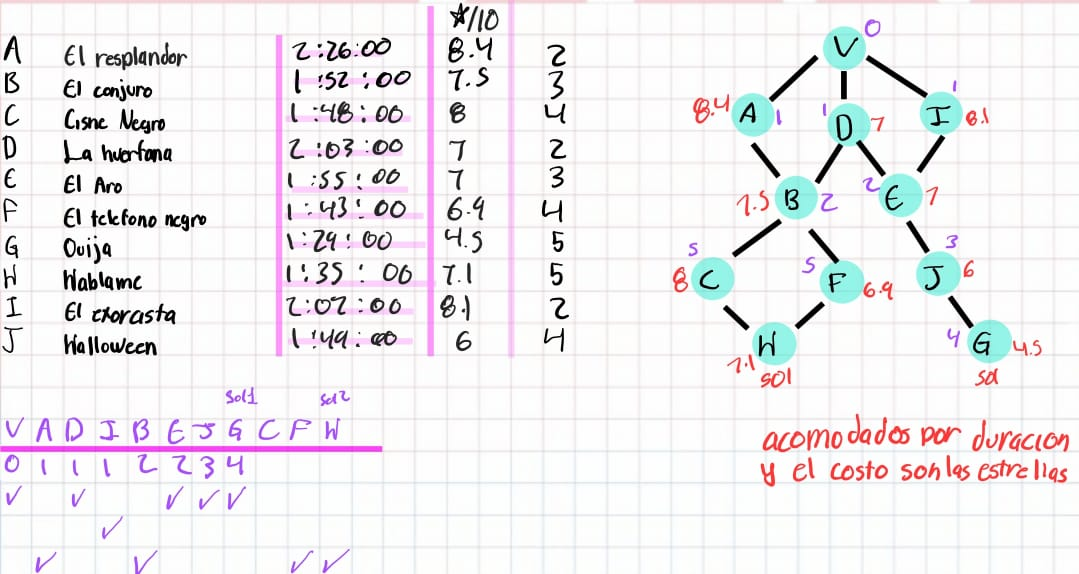

### Generamos el dataseed con las películas

In [53]:
#El diccionario tiene la siguiente estructura:
# key -> Letra asociada : Value -> [MovieName, IMDB]
dictionaryMovies = {
  "V":["inicio", 0],
  "A":["El resplandor", 8.4],
  "B":["El conjuro", 7.5],
  "C":["Cisne negro", 8],
  "D":["La huerfana", 7],
  "E":["El aro", 7],
  "F":["El telfono negro", 6.9],
  "G":["Ouija", 4.5],
  "H":["Hablame", 7.1],
  "I":["El exorcista", 8.1],
  "J":["Hallowen", 6]
}

# Se declara la estructura del grafo
graph = {
  "V":["A","D","I"],
  "A":["B"],
  "D":["B","E"],
  "I":["E"],
  "B":["C","F"],
  "E":["J"],
  "C":["H"],
  "F":["H"],
  "J":["G"]
}


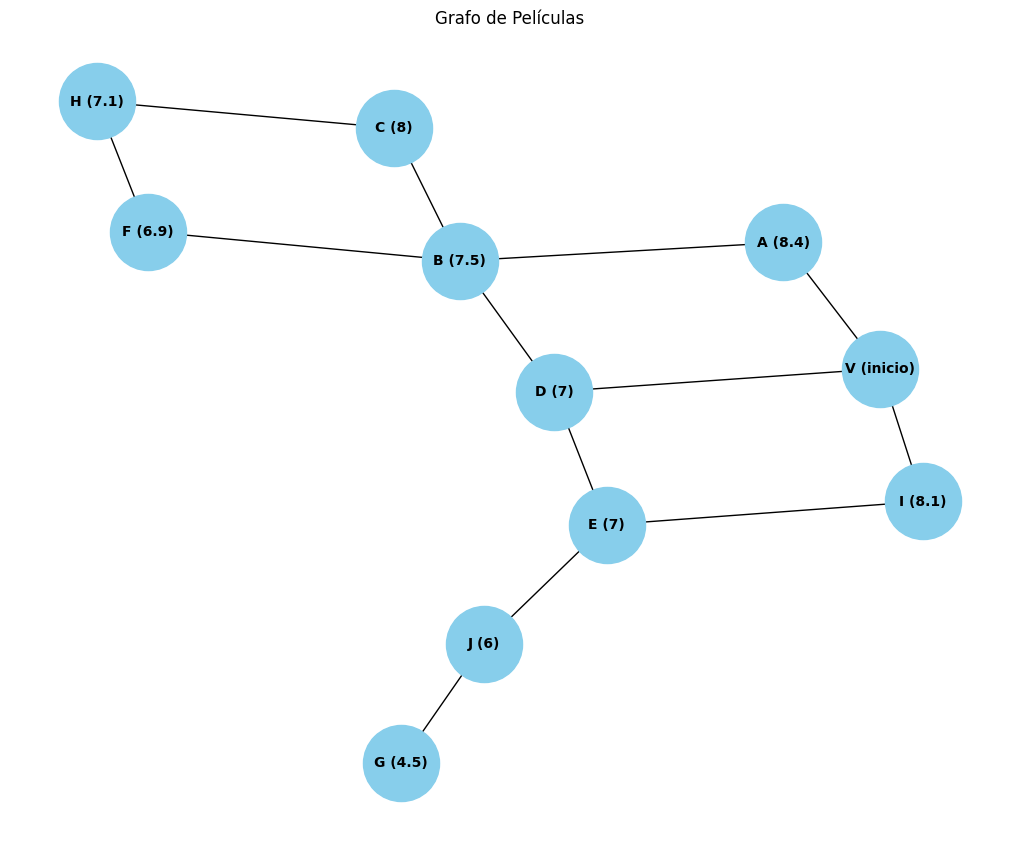

In [54]:
# Creamos un grafo para visualizar la dataseed
import networkx as nx
import matplotlib.pyplot as plt

def crear_grafo(graphDictionary, moviesDictionary):
  grafo = nx.Graph()

  for node, data in moviesDictionary.items():
    # name y imdb_rating se añaden como atributos del nodo
    grafo.add_node(node, name = data[0], imdb_rating = data[1])

  for parent_node, children_nodes in graphDictionary.items():
    for child_node in children_nodes:
      grafo.add_edge(parent_node, child_node)

  return grafo

grafo = crear_grafo(graph, dictionaryMovies)

pos = nx.kamada_kawai_layout(grafo)

labels = {}
for node, data in grafo.nodes(data=True):
    # Formateamos la etiqueta como "Letra (Rating IMDB)"
    # Para el nodo 'V' ("inicio"), mostramos "V (inicio)"
    if node == 'V':
        labels[node] = f"{node} ({data.get('name', node)})"
    else:
        labels[node] = f"{node} ({data.get('imdb_rating', 'N/A')})"

# Visualizar el grafo
plt.figure(figsize=(10, 8))
nx.draw(grafo, pos, with_labels=True, labels=labels, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
plt.title("Grafo de Películas")
plt.show()

Nodo actual: V (Evaluación: 0.00)
  Vecino: A (Evaluación: 8.40)
  Vecino: D (Evaluación: 7.00)
  Vecino: I (Evaluación: 8.10)
  Moviendo a mejor vecino: A
Nodo actual: A (Evaluación: 8.40)
  Vecino: V (Evaluación: 0.00)
  Vecino: B (Evaluación: 7.50)
No se encontraron vecinos con mejor evaluación. Máximo local alcanzado.

Algoritmo de ascenso de colinas terminado.
Punto de partida: V
Máximo local encontrado: A
Camino recorrido: V -> A


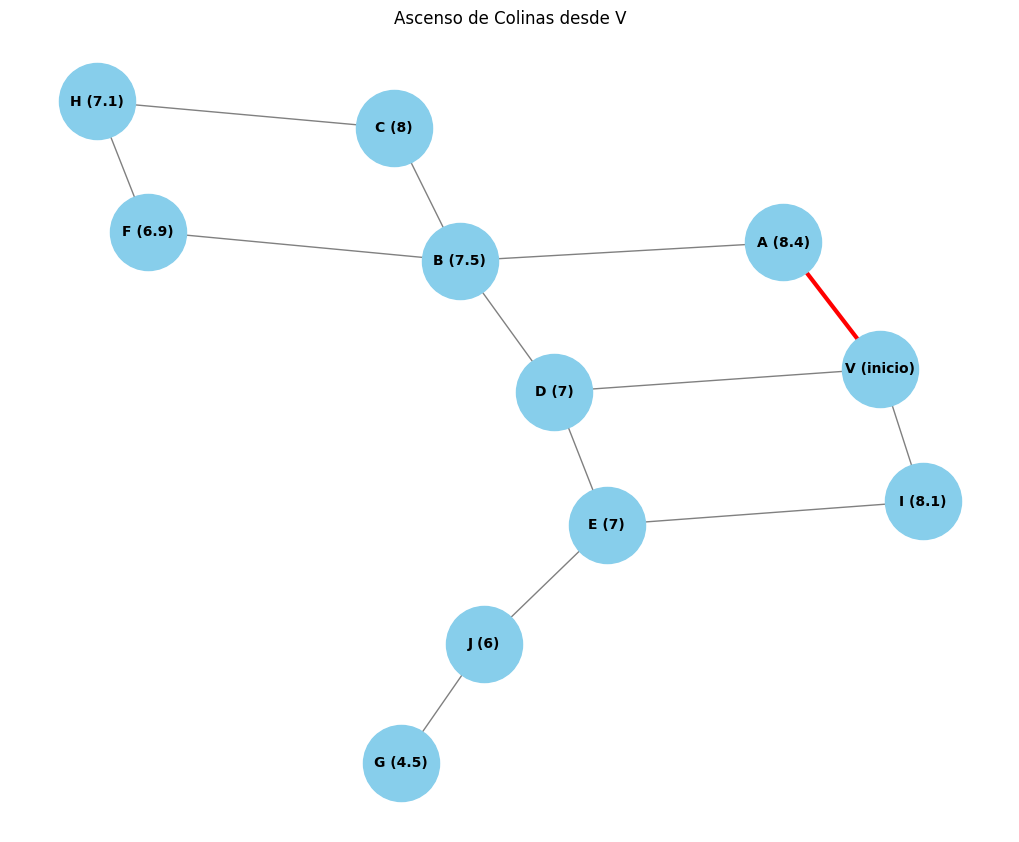

In [55]:
# Implementación del algoritmo de búsqueda por ascenso de colinas

def evaluar_pelicula(movie_data):
  """
  Función de evaluación simplificada basada en la calificación IMDB.
  En un futuro, podría incorporar la duración:
  return movie_data['imdb_rating'] - abs(movie_data['duration'] - 120)
  """
  return movie_data['imdb_rating']

def ascenso_colinas(grafo, start_node_key):
  """
  Implementa el algoritmo de búsqueda por ascenso de colinas.

  Args:
    grafo (nx.Graph): El grafo de películas.
    start_node_key (str): La clave del nodo inicial (ej. "V", "A").

  Returns:
    str: La clave del nodo que representa el máximo local encontrado.
    list: Una lista de las claves de los nodos visitados en el camino.
  """
  current_node_key = start_node_key
  path = [current_node_key]

  while True:
    current_movie_data = grafo.nodes[current_node_key]
    current_evaluation = evaluar_pelicula(current_movie_data)

    print(f"Nodo actual: {current_node_key} (Evaluación: {current_evaluation:.2f})")

    neighbors = list(grafo.neighbors(current_node_key))
    best_neighbor_key = None
    best_neighbor_evaluation = current_evaluation

    # Buscar el mejor vecino
    for neighbor_key in neighbors:
      neighbor_movie_data = grafo.nodes[neighbor_key]
      neighbor_evaluation = evaluar_pelicula(neighbor_movie_data)
      print(f"  Vecino: {neighbor_key} (Evaluación: {neighbor_evaluation:.2f})")

      # Criterio de ascenso: si el vecino es estrictamente mejor
      if neighbor_evaluation > best_neighbor_evaluation:
        best_neighbor_evaluation = neighbor_evaluation
        best_neighbor_key = neighbor_key

    # Si encontramos un vecino mejor, nos movemos a él
    if best_neighbor_key is not None:
      print(f"  Moviendo a mejor vecino: {best_neighbor_key}")
      current_node_key = best_neighbor_key
      path.append(current_node_key)
    else:
      # Si no hay vecino mejor, hemos alcanzado un máximo local
      print("No se encontraron vecinos con mejor evaluación. Máximo local alcanzado.")
      break

  return current_node_key, path

# --- Ejecutar el algoritmo ---

# Puedes empezar desde el nodo inicial "V" o desde cualquier otro nodo
start_node = "V"
final_node, visited_path = ascenso_colinas(grafo, start_node)

print(f"\nAlgoritmo de ascenso de colinas terminado.")
print(f"Punto de partida: {start_node}")
print(f"Máximo local encontrado: {final_node}")
print(f"Camino recorrido: {' -> '.join(visited_path)}")

# Opcional: Resaltar el camino recorrido en la visualización
if 'pos' in locals(): # Usamos la variable pos si ya fue creada para la visualización
    edge_colors = ['gray'] * len(grafo.edges())
    edge_width = [1] * len(grafo.edges())

    # Resaltar las aristas del camino recorrido
    for i in range(len(visited_path) - 1):
        u = visited_path[i]
        v = visited_path[i+1]
        try:
            # Buscar la arista en el grafo (considerando que es no dirigido)
            edge = (u, v) if (u, v) in grafo.edges() else (v, u)
            edge_index = list(grafo.edges()).index(edge)
            edge_colors[edge_index] = 'red'
            edge_width[edge_index] = 3
        except ValueError:
            # Esto no debería pasar si el camino es válido en el grafo
            pass

    plt.figure(figsize=(10, 8))
    # Reutilizamos las etiquetas y posiciones previamente definidas
    nx.draw(grafo, pos, with_labels=True, labels=labels,
            node_size=3000, node_color='skyblue', font_size=10, font_weight='bold',
            edge_color=edge_colors, width=edge_width, arrowsize=20)
    plt.title(f"Ascenso de Colinas desde {start_node}")
    plt.show()